## Table of Contents: Netflix User Data Analysis Project
- #### Chapter 1 - Import Libraries , Load datasets.
- #### Chapter 2: Data Cleaning & Preprocessing
- #### Chapter 3: Exploratory Data Analysis (EDA)
- #### Chapter 4: Feature Engineering
- #### Chapter 5: Clustering Algorithms
- #### Chapter 6: Dashboard & Visualization
- #### Conclusion 

### Chapter 1 -  Import Libraries , Load datasets.

#### 1.1 Import libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 1.2 Load

In [157]:
df = pd.read_csv("/kaggle/input/netflix-raw-dataset/netflix_dataset_raw.csv",engine="python")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.head())
print(df.tail())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en                  

## Chapter 2 - Data Cleaning & Preprocessing

#### 2.1 Data Overview :

In [158]:
# See all Columns
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [159]:
#Short Description of Dataset

print("Describe about the data : \n",df.describe())
print("Information about the data : \n")
df.info()

#check for missing values : 
print("check for missing or null value : \n",df.isnull().sum())

Describe about the data : 
         Popularity
count  9827.000000
mean     40.320570
std     108.874308
min       7.100000
25%      16.127500
50%      21.191000
75%      35.174500
max    5083.954000
Information about the data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB
check for missing or null value : 
 Release_Date          0
Title                 

- #### check for duplicates:

In [160]:
print(df.duplicated().sum())
print(df.duplicated())

0
0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool


#### 2.2 correct the data type of date, Release_Date, Popularity, Vote_Count, Vote_Average

In [161]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'],errors = 'coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'],errors = 'coerce').astype("Int64")
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'],errors = 'coerce').astype(float)

df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9826.0,9826.000000
mean,2006-09-23 11:05:51.317798144,40.320570,1392.943721,6.439467
min,1902-04-17 00:00:00,7.100000,0.0,0.000000
25%,2000-10-18 00:00:00,16.127500,146.0,5.900000
50%,2011-09-13 00:00:00,21.191000,444.0,6.500000
75%,2017-11-22 00:00:00,35.174500,1376.0,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.0,10.000000
std,NaN,108.874308,2611.303856,1.129797


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   Int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(5)
memory usage: 701.4+ KB


#### 2.3 Drop unnecessary column - not required in analysis.

In [163]:
 # df.drop(['Overview','Poster_Url'],axis = 1,inplace=True)

In [164]:
df['Year'] = df['Release_Date'].dt.year
df['Months'] = df['Release_Date'].dt.month
print(df['Months'].dtype)
print(df.columns)
print(df['Year'].nunique())

float64
Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Year', 'Months'],
      dtype='object')
102


In [165]:
print(df.nunique())
print(df.count())

Release_Date         5893
Title                9514
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      44
Genre                2337
Year                  102
Months                 12
dtype: int64
Release_Date         9827
Title                9828
Popularity           9827
Vote_Count           9826
Vote_Average         9826
Original_Language    9827
Genre                9826
Year                 9827
Months               9827
dtype: int64


In [166]:
print(df.count())
print("-"*130)
print(df.isnull().sum())


Release_Date         9827
Title                9828
Popularity           9827
Vote_Count           9826
Vote_Average         9826
Original_Language    9827
Genre                9826
Year                 9827
Months               9827
dtype: int64
----------------------------------------------------------------------------------------------------------------------------------
Release_Date         10
Title                 9
Popularity           10
Vote_Count           11
Vote_Average         11
Original_Language    10
Genre                11
Year                 10
Months               10
dtype: int64


#### 2.4 remove the null values

In [167]:
df = df.dropna(subset=['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Year', 'Months'])

In [168]:
# check unique Genre : 
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

#### To categorize the columns . like - rating above 8 are popular, between 7-8 average,.....
- We would cut the `Vote_Average` values and make 4 categories: `popular`, `average`, `below_avg`, `not_popular` to describe it more using function.


In [169]:
# create a function :
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges, labels = labels,duplicates='drop')
    return df
    

In [170]:
labels = ['not-popular','below-avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Months
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",2021.0,12.0
1,2022-03-01,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller",2022.0,3.0
2,2022-02-25,No Exit,2618.087,122,below-avg,en,Thriller,2022.0,2.0
3,2021-11-24,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",2021.0,11.0
4,2021-12-22,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War",2021.0,12.0


In [171]:
# check - each labels count - how much popular, non - poplular, avg..
df['Vote_Average'].value_counts()

Vote_Average
not-popular    2467
popular        2450
average        2411
below-avg      2398
Name: count, dtype: int64

#### 2.5 Check for duplicats again

In [172]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9826, dtype: bool

#### 2.6 Each movie with multiple genres was normalized by splitting them into separate rows, ensuring one row per movie–genre pair.

In [173]:
# first remove the space 

df['Genre'] = df['Genre'].str.split(", ") # split through , and space 

In [174]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Months
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,"[Action, Adventure, Science Fiction]",2021.0,12.0
1,2022-03-01,The Batman,3827.658,1151,popular,en,"[Crime, Mystery, Thriller]",2022.0,3.0
2,2022-02-25,No Exit,2618.087,122,below-avg,en,[Thriller],2022.0,2.0
3,2021-11-24,Encanto,2402.201,5076,popular,en,"[Animation, Comedy, Family, Fantasy]",2021.0,11.0
4,2021-12-22,The King's Man,1895.511,1793,average,en,"[Action, Adventure, Thriller, War]",2021.0,12.0


In [175]:
# normalize : 
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Months
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Action,2021.0,12.0
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure,2021.0,12.0
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction,2021.0,12.0
3,2022-03-01,The Batman,3827.658,1151,popular,en,Crime,2022.0,3.0
4,2022-03-01,The Batman,3827.658,1151,popular,en,Mystery,2022.0,3.0


In [176]:
# 
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

## Chapter 3 – Exploratory Data Analysis (EDA)

#### 3.1 Data Overview: 

In [177]:
r,c = df.shape
print(f"rows = {r}, columns = {c}.")

print("\n\nINFORMATION ABOUT THE DATA : \n")
print(df.info())


print("\n\nDESCRIPTION OF THE DATA : \n",df.describe())

rows = 25792, columns = 9.


INFORMATION ABOUT THE DATA : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       25792 non-null  datetime64[ns]
 1   Title              25792 non-null  object        
 2   Popularity         25792 non-null  float64       
 3   Vote_Count         25792 non-null  Int64         
 4   Vote_Average       25551 non-null  category      
 5   Original_Language  25792 non-null  object        
 6   Genre              25792 non-null  category      
 7   Year               25792 non-null  float64       
 8   Months             25792 non-null  float64       
dtypes: Int64(1), category(2), datetime64[ns](1), float64(3), object(2)
memory usage: 1.5+ MB
None


DESCRIPTION OF THE DATA : 
                         Release_Date    Popularity   Vote_Count          Year  \
count            

#### 

#### 3.2 Missing Values check

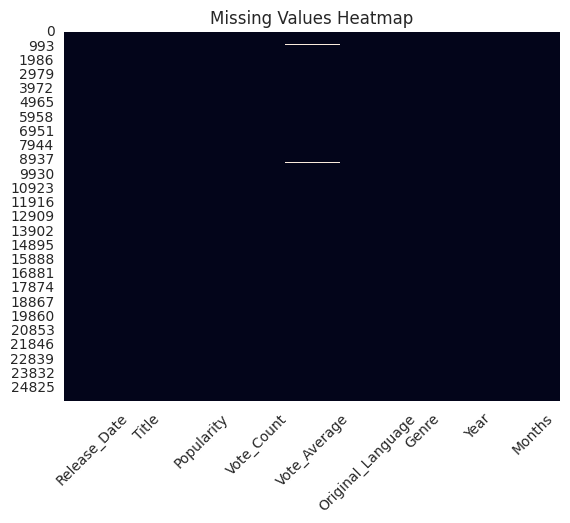

In [178]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xticks(rotation=45)   # X-axis labels ko rotate karo
plt.show()

#### 3.3 Univariate Analysis

In [179]:
#  Univariate Analysis (summary only)
print("\nQ1.Top 10 Genres:")
print(df['Genre'].value_counts().head(10))


print("\n\nQ2.Top Languages:")
print(df['Original_Language'].value_counts().head(10))


print("\n\nQ3.Vote_Average Distribution:")
print(df['Vote_Average'].describe())


print("\n\nQ4.Popularity Distribution:")
print(df['Popularity'].describe())


# 5. Time-based Trends
print("\n\nQ5.Movies per Year:")
print(df['Year'].value_counts().sort_index().head(10))  # show first 10 years


Q1.Top 10 Genres:
Genre
Drama        3744
Comedy       3031
Action       2686
Thriller     2488
Adventure    1853
Romance      1476
Horror       1470
Animation    1438
Family       1414
Fantasy      1308
Name: count, dtype: int64


Q2.Top Languages:
Original_Language
en    20018
ja     2025
fr      692
es      659
ko      420
zh      364
cn      299
it      251
ru      229
de      198
Name: count, dtype: int64


Q3.Vote_Average Distribution:
count       25551
unique          4
top       average
freq         6612
Name: Vote_Average, dtype: object


Q4.Popularity Distribution:
count    25792.000000
mean        42.000539
std        113.343183
min         13.354000
25%         16.365750
50%         21.862000
75%         36.503000
max       5083.954000
Name: Popularity, dtype: float64


Q5.Movies per Year:
Year
1902.0     3
1920.0     4
1921.0     5
1922.0     5
1925.0     2
1926.0     8
1927.0     6
1929.0     2
1930.0     2
1931.0    15
Name: count, dtype: int64


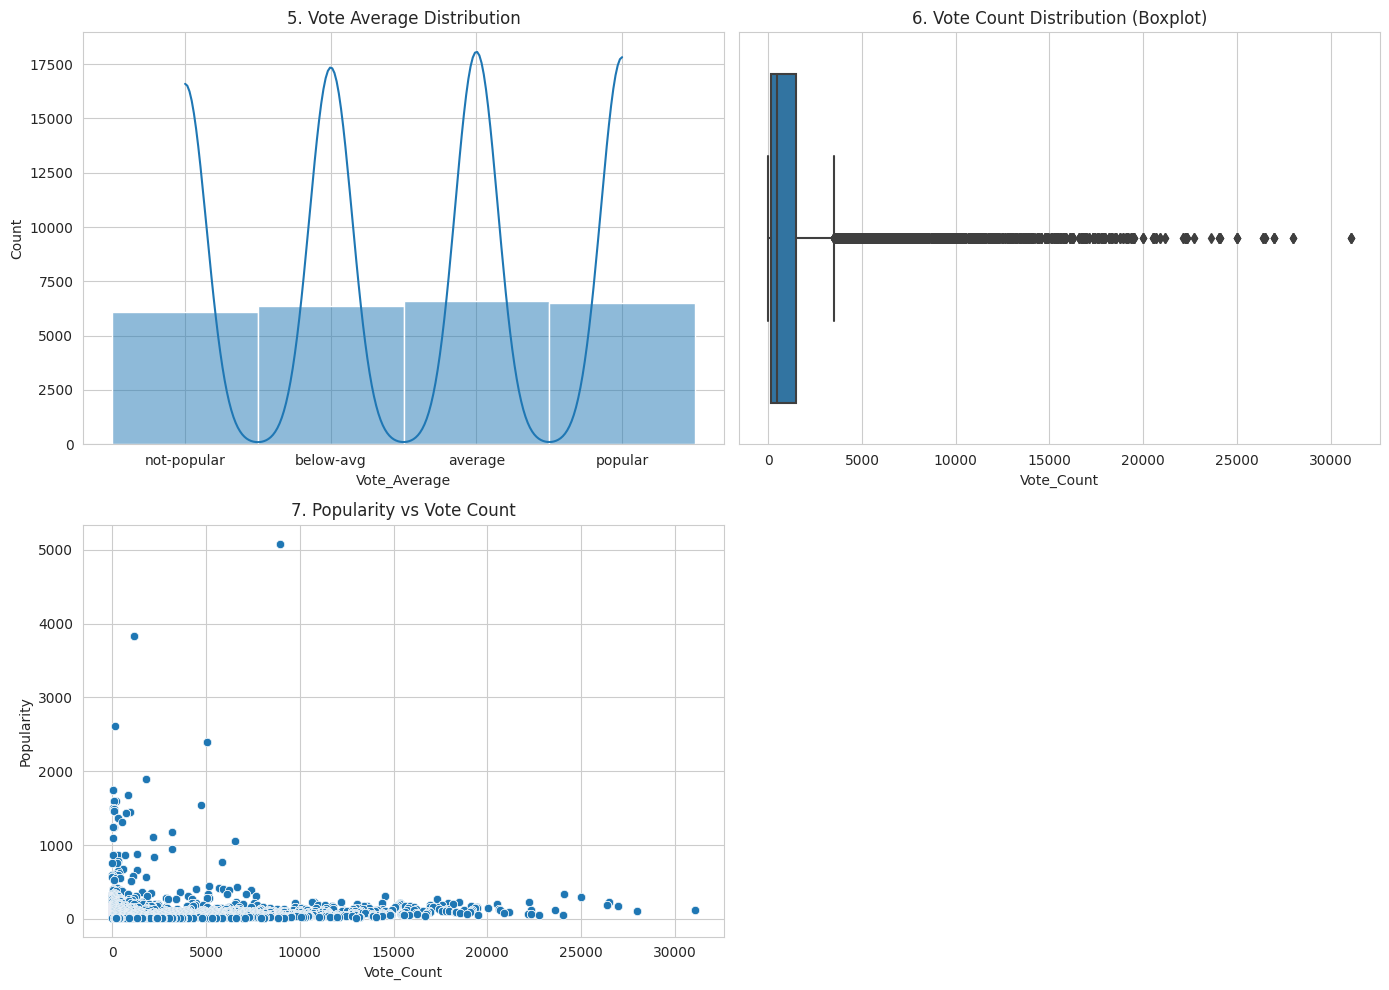

In [180]:
fig,axes = plt.subplots(2,2,figsize=(14,10))

#------------------------
# Univarite Analysis 
#------------------------
# Vote Average
sns.histplot(df['Vote_Average'], bins=20, kde=True,ax = axes[0, 0])
axes[0, 0].set_title("5. Vote Average Distribution")

# Vote Count
sns.boxplot(x=df['Vote_Count'],ax = axes[0, 1])
axes[0, 1].set_title("6. Vote Count Distribution (Boxplot)")

#-----------------------
# Bivariate Analysis
#-----------------------
sns.scatterplot(x='Vote_Count', y='Popularity', data=df,ax=axes[1, 0])
axes[1, 0].set_title("7. Popularity vs Vote Count")

axes[1,1].axis('off') # don't show anything.

plt.tight_layout()
plt.show()

## Chapter 4 -  Feature Engineering

#### 4.1 Derive some new featurs: 

In [181]:
# extract year and month from the date 
df['Year'] = df['Release_Date'].dt.year
df['Months'] = df['Release_Date'].dt.month

print(df['Months'].dtype)  # give the data type of the columns
print(df.columns)  # print all columns
print(df['Year'].nunique())  # give total unique year 

int32
Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Year', 'Months'],
      dtype='object')
102


In [182]:
# Release Era :
era_bins = [0,1970,1990,2010,df['Year'].max()+1]
era_labels = ['Old','Classic','Modern','Contemporary']
df['Release_Era'] = pd.cut(df['Year'],bins = era_bins, labels=era_labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Months,Release_Era
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Action,2021,12,Contemporary
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure,2021,12,Contemporary
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction,2021,12,Contemporary
3,2022-03-01,The Batman,3827.658,1151,popular,en,Crime,2022,3,Contemporary
4,2022-03-01,The Batman,3827.658,1151,popular,en,Mystery,2022,3,Contemporary


## Chapter 5 - Clustering Algorithms

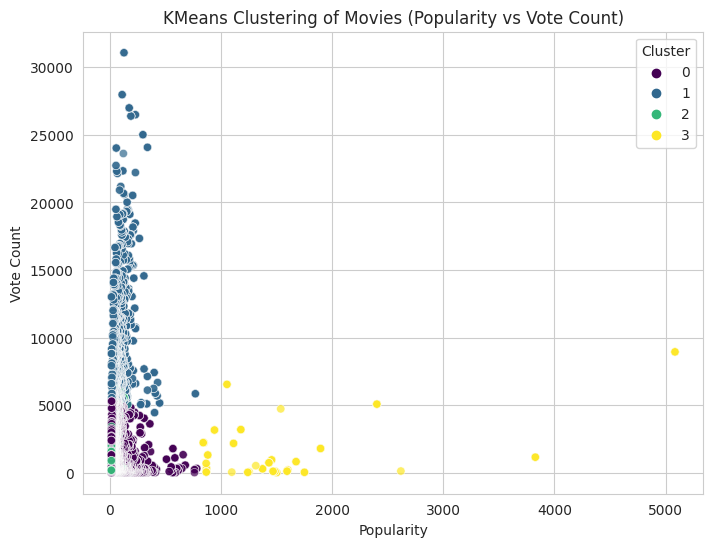

          Popularity   Vote_Count         Year
Cluster                                       
0          35.822474   894.485518  2012.317489
1          89.447152  9739.566591  2009.189616
2          22.332086   894.496686  1980.630850
3        1564.780244  1706.046512  2021.430233


In [191]:
# Chapter 5: Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#  Step 1: Feature selection
features = df[['Popularity', 'Vote_Count', 'Year']].copy()

# Step 2: Handle missing values (safe imputation)
for col in features.columns:
    features[col] = features[col].fillna(features[col].median())

# Step 3: Scale the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply KMeans 
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Popularity'], y=df['Vote_Count'],
                hue=df['Cluster'], palette="viridis", alpha=0.7)
plt.title("KMeans Clustering of Movies (Popularity vs Vote Count)")
plt.xlabel("Popularity")
plt.ylabel("Vote Count")
plt.legend(title="Cluster")
plt.show()

# Step 6: Cluster summary
cluster_summary = df.groupby('Cluster')[['Popularity','Vote_Count','Year']].mean()
print(cluster_summary)


## Chapter 6 - Data Visualization

In [183]:
sns.set_style("whitegrid") # set the chart background

### 6.1 KPIs


In [184]:
# KPI  Calculation 
total_content = len(df)
avg_popularity = df['Popularity'].mean()
avg_vote_count =df['Vote_Count'].mean()
total_Genre = df['Genre'].nunique()

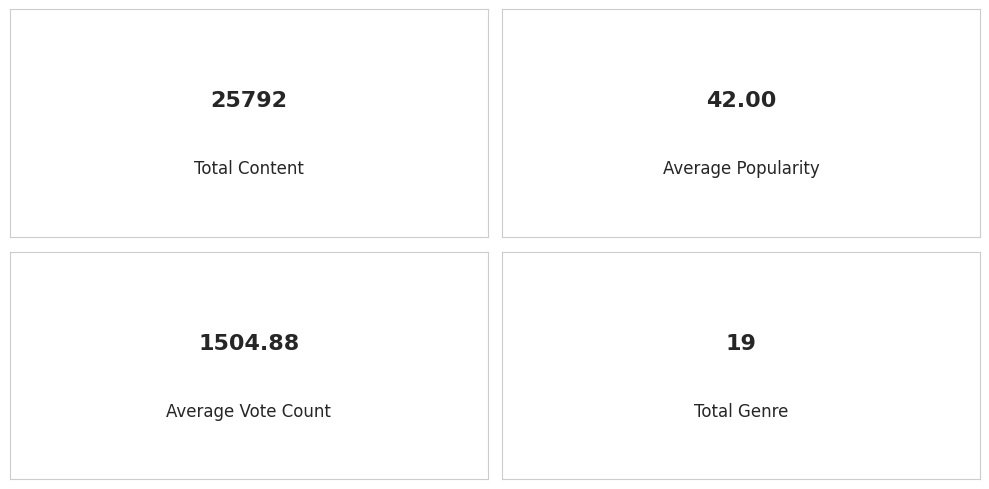

In [185]:
#Figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

kpi_values = [total_content, avg_popularity,avg_vote_count , total_Genre]
kpi_titles = ["Total Content", "Average Popularity", "Average Vote Count", "Total Genre"]

for ax, value, title in zip(axes, kpi_values, kpi_titles):
    ax.text(0.5, 0.6, f"{value:.2f}" if isinstance(value, float) else f"{value}",
            fontsize=16, ha='center', va='center', fontweight='bold')
    ax.text(0.5, 0.3, title, fontsize=12, ha='center', va='center')
    ax.set_xticks([]); ax.set_yticks([])   # no ticks
    ax.set_frame_on(True)                 # show box

plt.tight_layout()
plt.show()

#### 6.2 Charts and Graphs

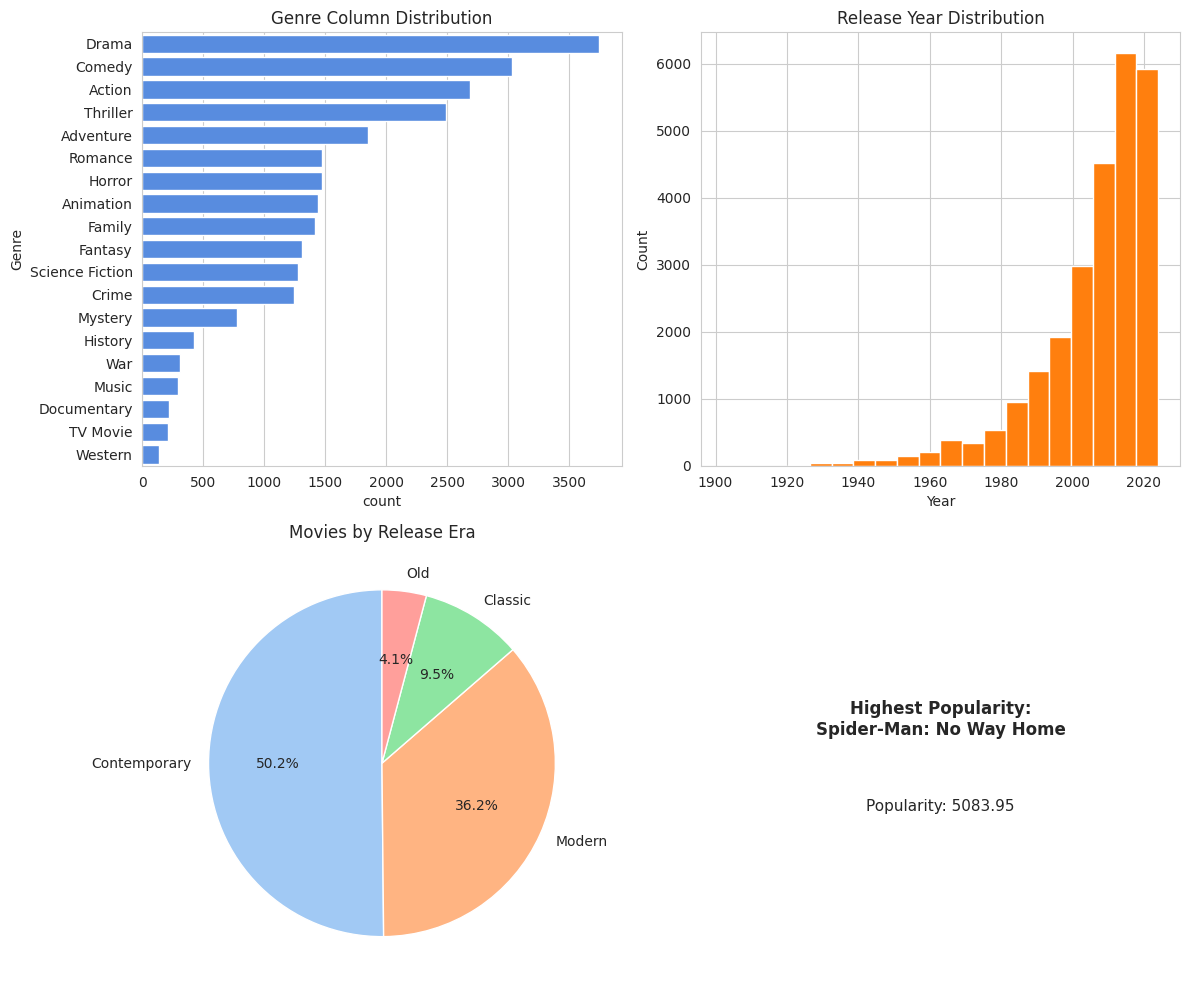

In [186]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Genre distribution (horizontal bar chart)
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, 
              color='#4287f5', ax=axes[0,0])
axes[0,0].set_title("Genre Column Distribution")

# 2. Year distribution (histogram)
df['Year'].hist(ax=axes[0,1], bins=20, color='#ff7f0e')
axes[0,1].set_title("Release Year Distribution")
axes[0,1].set_xlabel("Year")
axes[0,1].set_ylabel("Count")

# 3. New chart: Release Era distribution (Pie chart)
release_era_counts = df['Release_Era'].value_counts()
axes[1,0].pie(release_era_counts, labels=release_era_counts.index,
              autopct='%1.1f%%', startangle=90, 
              colors=sns.color_palette("pastel"))
axes[1,0].set_title("Movies by Release Era")


# 4. Movie with highest popularity (text annotation instead of table)
top_movie = df.loc[df['Popularity'].idxmax()]
axes[1,1].axis("off")  # hide axes
axes[1,1].text(0.5, 0.6, f"Highest Popularity:\n{top_movie['Title']}", 
               ha="center", va="center", fontsize=12, fontweight="bold")
axes[1,1].text(0.5, 0.4, f"Popularity: {top_movie['Popularity']:.2f}", 
               ha="center", va="center", fontsize=11)


plt.tight_layout()
plt.show()


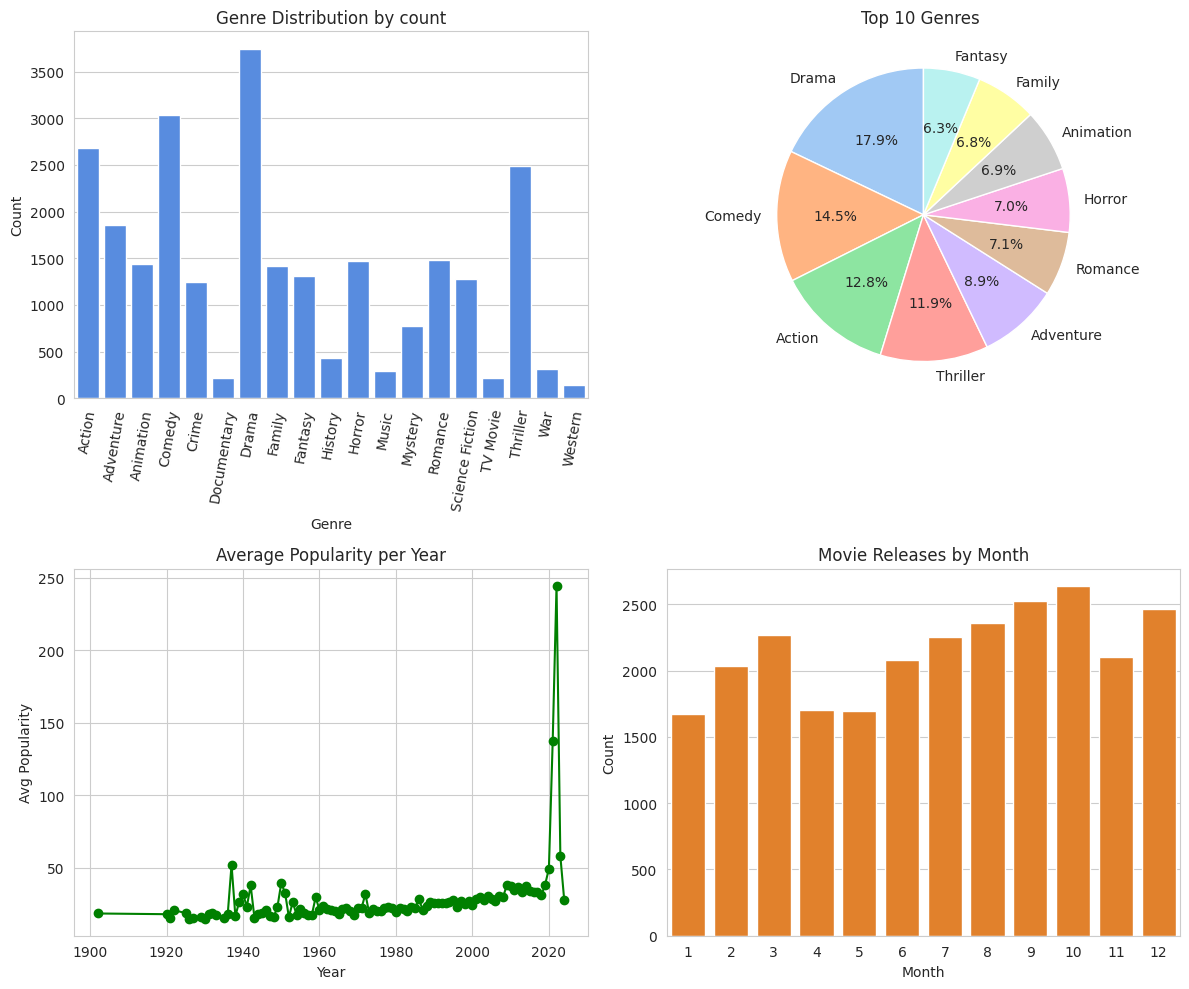

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Bar chart: Count vs Genre
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts, ax=axes[0,0], color="#4287f5")
axes[0,0].set_title("Genre Distribution by count")
axes[0,0].set_xlabel("Genre")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis='x', rotation=80)

# 2. Pie chart: Genre distribution
axes[0,1].pie(genre_counts[:10], labels=genre_counts.index[:10], autopct='%1.1f%%', 
              startangle=90, colors=sns.color_palette("pastel"))
axes[0,1].set_title("Top 10 Genres ")

# 3. Line chart: Popularity trend over Year
yearly_popularity = df.groupby("Year")["Popularity"].mean()
axes[1,0].plot(yearly_popularity.index, yearly_popularity.values, marker="o", color="green")
axes[1,0].set_title("Average Popularity per Year")
axes[1,0].set_xlabel("Year")
axes[1,0].set_ylabel("Avg Popularity")

# 4. Countplot: Movies per Release Month
sns.countplot(x="Months", data=df, ax=axes[1,1], color="#ff7f0e")
axes[1,1].set_title("Movie Releases by Month")
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


### 6.3 Some Questions :
- #### Most frequent genre of movies release on netflix:

Q1 - Most frequent genre of movies release on netflix:
count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object


Q2 - Highest vote in the vote_Average column


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


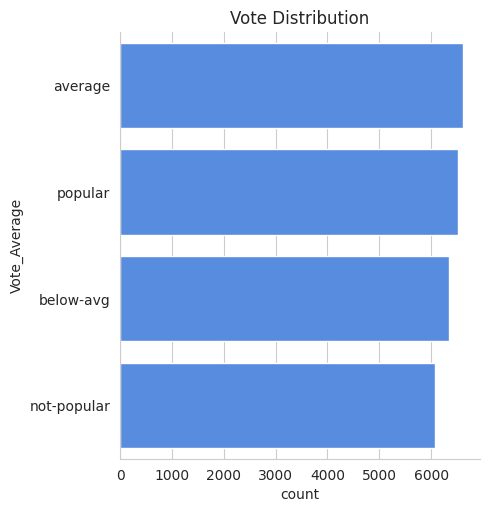

In [188]:
print("Q1 - Most frequent genre of movies release on netflix:")
print(df['Genre'].describe())

print("\n\nQ2 - Highest vote in the vote_Average column")
sns.catplot(y='Vote_Average',data=df, kind='count', order =df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title("Vote Distribution")
plt.show()

Q3 - what movie got the highest popularity ?
  Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0   2021-12-15  Spider-Man: No Way Home    5083.954        8940      popular   
1   2021-12-15  Spider-Man: No Way Home    5083.954        8940      popular   
2   2021-12-15  Spider-Man: No Way Home    5083.954        8940      popular   

  Original_Language            Genre  Year  Months   Release_Era  
0                en           Action  2021      12  Contemporary  
1                en        Adventure  2021      12  Contemporary  
2                en  Science Fiction  2021      12  Contemporary  


Q4 - this year , when most movies released?


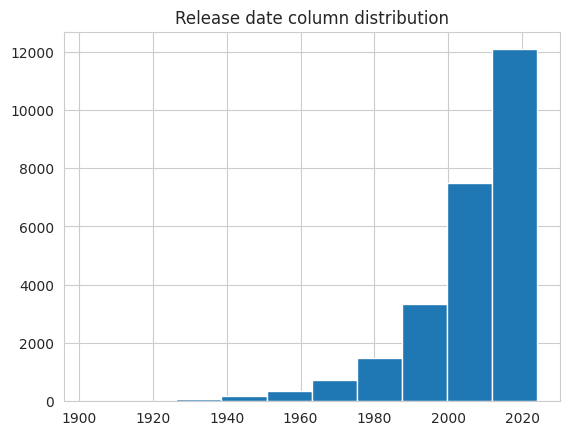

In [189]:
print("Q3 - what movie got the highest popularity ?")
print(df[df['Popularity'] == df['Popularity'].max()])

print("\n\nQ4 - this year , when most movies released?") 
df['Year'].hist()
plt.title('Release date column distribution')
plt.show()

## Conclusion

**`The analysis highlighted important trends and relationships in the data, giving a clear foundation for advanced modeling and strategic recommendations`.**